In [1]:
from tensorflow import keras
from tensorflow.keras import layers

H:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
# 查看null数值
data[data['pm2.5'].isna()]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [6]:
# iloc 取24后的数据
data = data.iloc[24:].copy()

In [7]:
# 使用fillna 使用最近的数据进行前项填充
data.fillna(method='ffill', inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 24 to 43823
Data columns (total 13 columns):
No       43800 non-null int64
year     43800 non-null int64
month    43800 non-null int64
day      43800 non-null int64
hour     43800 non-null int64
pm2.5    43800 non-null float64
DEWP     43800 non-null int64
TEMP     43800 non-null float64
PRES     43800 non-null float64
cbwd     43800 non-null object
Iws      43800 non-null float64
Is       43800 non-null int64
Ir       43800 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [9]:
data.drop('No', axis=1, inplace=True)

In [10]:
import datetime

In [11]:
# 把多列的时间组合成一列
data['time'] = data.apply(lambda x: datetime.datetime(year=x['year'],
                                       month=x['month'],
                                       day=x['day'], 
                                       hour=x['hour']), 
                          axis=1)

In [12]:
# 把这一列处理成索引
data.set_index('time', inplace=True)

In [13]:
# 抛弃这几列，采用inplace立即生效
data.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [14]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [15]:
data.columns = ['pm2.5', 'dew', 'temp', 'press', 'cbwd', 'iws', 'snow', 'rain']

In [16]:
# 是对象
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [17]:
# 初始化，读热编码化
data = data.join(pd.get_dummies(data.cbwd))

In [18]:
del data['cbwd']

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
pm2.5    43800 non-null float64
dew      43800 non-null int64
temp     43800 non-null float64
press    43800 non-null float64
iws      43800 non-null float64
snow     43800 non-null int64
rain     43800 non-null int64
NE       43800 non-null uint8
NW       43800 non-null uint8
SE       43800 non-null uint8
cv       43800 non-null uint8
dtypes: float64(4), int64(3), uint8(4)
memory usage: 4.1 MB


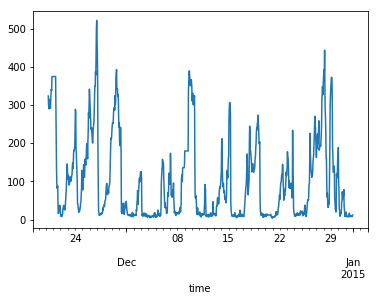

In [20]:
# 最后1000次PM2.5的变化情况
data['pm2.5'][-1000:].plot()

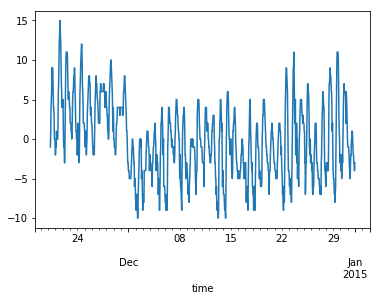

In [21]:
# 温度的变化
data['temp'][-1000:].plot()

In [22]:
data.head(3)

,pm2.5,dew,temp,press,iws,snow,rain,NE,NW,SE,cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0


In [23]:
# 需要观测多久的数据，前面五天的数据 5*24
sequence_length = 5*24
# 未来一天的数据
delay = 24

In [24]:
data_ = []
# 我们只需要采集倒数六天，总的天数-观测长度-未来一天
for i in range(len(data) - sequence_length - delay):
    data_.append(data.iloc[i: i + sequence_length + delay])

In [25]:
# df转成arr,
# data_[0].shape
# 144个观察数据，前面5*24数据是我们的训练数据，最后那个数据是我们预测数据
data_ = np.array([df.values for df in data_])

In [26]:
#  43656条数据，每条长度144，每一个观察数据的特征值是11
data_.shape

(43656, 144, 11)

In [27]:
# 乱序我们的数据
np.random.shuffle(data_)

In [28]:
# 提取我们的训练以及目标值
# 第二维，前面的5*24是我们需要的
x = data_[:, :-delay,:]
# （全部，每个序列的最后一个值，第一个值）
y = data_[:, -1, 0]

In [29]:
# 切片数据
split_boundary = int(data_.shape[0] * 0.8)

In [30]:
train_x = x[: split_boundary]
test_x = x[split_boundary:]

train_y = y[: split_boundary]
test_y = y[split_boundary:]

In [31]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((34924, 120, 11), (8732, 120, 11), (34924,), (8732,))

In [32]:
# 数据标准化
# 需要注意只能在train上做 每一列的均值
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

In [33]:
mean.shape

(120, 11)

In [34]:
train_x = (train_x - mean)/std

In [35]:
test_x = (test_x - mean)/std

先从简单的开始

In [36]:
batch_size = 128

基础模型 

In [37]:
# 初始化
model = keras.Sequential()
# train_x_shape （34924，120，11）我们只关注后面两位
# 扁平化，同时观察120个输入数据 扁平化之后就不考虑前后的了
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32, activation='relu'))
# 不需要激活，这是一个回归
model.add(layers.Dense(1))

In [38]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=50,
                    validation_data=(test_x, test_y)
                    )

Train on 34924 samples, validate on 8732 samples
Epoch 1/50
34924/34924 [==============================] - 3s 75us/step - loss: 71.7460 - val_loss: 65.2065
Epoch 2/50
34924/34924 [==============================] - 2s 57us/step - loss: 62.5733 - val_loss: 60.3283
Epoch 3/50
34924/34924 [==============================] - 2s 57us/step - loss: 59.3116 - val_loss: 59.0022
Epoch 4/50
34924/34924 [==============================] - 2s 56us/step - loss: 57.8837 - val_loss: 58.0606
Epoch 5/50
34924/34924 [==============================] - 2s 56us/step - loss: 56.8580 - val_loss: 57.3702
Epoch 6/50
34924/34924 [==============================] - 2s 55us/step - loss: 56.0321 - val_loss: 57.1347
Epoch 7/50
34924/34924 [==============================] - 2s 55us/step - loss: 55.2609 - val_loss: 56.4148
Epoch 8/50
34924/34924 [==============================] - 2s 55us/step - loss: 54.5894 - val_loss: 56.0588
Epoch 9/50
34924/34924 [==============================] - 2s 55us/step - loss: 53.9925 - val_lo

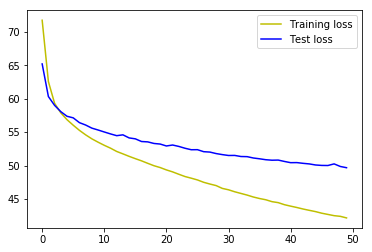

In [39]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

# LSTM

In [46]:
model = keras.Sequential()
# LSTM是循环的神经网络，沿着时间变化的趋势的问题
# LSTM网络是一个三维的网络
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:])))
model.add(layers.Dense(1))

In [47]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')

In [48]:
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=200,
                    validation_data=(test_x, test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/200
34924/34924 [==============================] - 56s 2ms/step - loss: 88.4082 - val_loss: 82.0198
Epoch 2/200
34924/34924 [==============================] - 56s 2ms/step - loss: 80.1085 - val_loss: 76.9022
Epoch 3/200
34924/34924 [==============================] - 55s 2ms/step - loss: 75.8771 - val_loss: 73.2824
Epoch 4/200
34924/34924 [==============================] - 53s 2ms/step - loss: 72.7580 - val_loss: 70.5160
Epoch 5/200
34924/34924 [==============================] - 53s 2ms/step - loss: 70.4230 - val_loss: 68.4795
Epoch 6/200
34924/34924 [==============================] - 53s 2ms/step - loss: 68.6456 - val_loss: 66.8473
Epoch 7/200
34924/34924 [==============================] - 53s 2ms/step - loss: 66.9879 - val_loss: 65.1626
Epoch 8/200
34924/34924 [==============================] - 53s 2ms/step - loss: 65.4807 - val_loss: 63.8404
Epoch 9/200
34924/34924 [==============================] - 53s 2ms/step - loss: 64.2429

Epoch 76/200
34924/34924 [==============================] - 55s 2ms/step - loss: 51.8363 - val_loss: 50.9280
Epoch 77/200
34924/34924 [==============================] - 54s 2ms/step - loss: 50.8700 - val_loss: 51.3143
Epoch 78/200
34924/34924 [==============================] - 55s 2ms/step - loss: 51.0949 - val_loss: 51.7703
Epoch 79/200
34924/34924 [==============================] - 57s 2ms/step - loss: 51.5899 - val_loss: 51.8728
Epoch 80/200
34924/34924 [==============================] - 55s 2ms/step - loss: 51.3048 - val_loss: 51.4568
Epoch 81/200
34924/34924 [==============================] - 57s 2ms/step - loss: 52.1924 - val_loss: 52.1008
Epoch 82/200
34924/34924 [==============================] - 57s 2ms/step - loss: 51.4649 - val_loss: 52.4641
Epoch 83/200
34924/34924 [==============================] - 54s 2ms/step - loss: 52.0121 - val_loss: 51.6527
Epoch 84/200
34924/34924 [==============================] - 54s 2ms/step - loss: 53.9491 - val_loss: 52.9618
Epoch 85/200
34924/

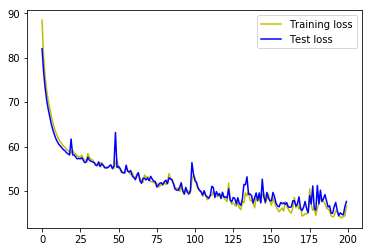

In [49]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

## LSTM层的优化
LSTM层的优化和在训练中降低学习速率

In [68]:
model = keras.Sequential()
#  因为LSTM输入需要三维数据，所以需要返回一个序列
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [69]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')

In [70]:
# 训练中降低学习速率
# callbacks.ReduceLROnPlateau 训练过程中降低学习速率
# monitor 降低的标准 
# patience=3在连续三个batch没有降低就触发降低学习速率，降低速率factor(超参数)
# min_lr 学习率的最低值，达到此处后不再下降
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

In [71]:
# 训练时使用，采用callbacks,参数是list  可以有多个会滴
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=200,
                    validation_data=(test_x, test_y),
                    callbacks=[learning_rate_reduction])

Train on 34924 samples, validate on 8732 samples
Epoch 1/200
34924/34924 [==============================] - 163s 5ms/step - loss: 87.8405 - val_loss: 82.4943
Epoch 2/200
34924/34924 [==============================] - 161s 5ms/step - loss: 80.6917 - val_loss: 77.5596
Epoch 3/200
34924/34924 [==============================] - 158s 5ms/step - loss: 76.5511 - val_loss: 73.9945
Epoch 4/200
34924/34924 [==============================] - 157s 5ms/step - loss: 73.4437 - val_loss: 71.2060
Epoch 5/200
34924/34924 [==============================] - 157s 5ms/step - loss: 71.0459 - val_loss: 69.0802
Epoch 6/200
34924/34924 [==============================] - 157s 5ms/step - loss: 69.2386 - val_loss: 67.5249
Epoch 7/200
34924/34924 [==============================] - 157s 4ms/step - loss: 67.9378 - val_loss: 66.4430
Epoch 8/200
34924/34924 [==============================] - 158s 5ms/step - loss: 67.0219 - val_loss: 65.6854
Epoch 9/200
34924/34924 [==============================] - 157s 5ms/step - loss

34924/34924 [==============================] - 156s 4ms/step - loss: 29.2146 - val_loss: 30.7731
Epoch 76/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.8769 - val_loss: 30.5097
Epoch 77/200
34924/34924 [==============================] - 158s 5ms/step - loss: 28.8874 - val_loss: 30.6552
Epoch 78/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.7219 - val_loss: 30.4542
Epoch 79/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.5923 - val_loss: 30.4131
Epoch 80/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.5602 - val_loss: 30.1668
Epoch 81/200
34924/34924 [==============================] - 157s 4ms/step - loss: 28.4362 - val_loss: 29.9731
Epoch 82/200
34924/34924 [==============================] - 156s 4ms/step - loss: 28.4768 - val_loss: 30.1384
Epoch 83/200
34924/34924 [==============================] - 157s 4ms/step - loss: 28.0526 - val_loss: 30.0570
Epoch 84/200
34924/3492

KeyboardInterrupt: 

In [ ]:
# 虽然说存在过拟合的问题，我们在后面进行优化
model.save('pm2.5_v3.h5')

## 使用模型进行预测和评价


In [ ]:
# 直接返回评价结果
model.evaluate(test_x.test_y,verbose=0)

In [ ]:
# 预测
pre_test=model.predict(test_x)

In [ ]:
test_x.shape